## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k, replace=False):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=replace)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[ 17,  55, 100],
       [ 15,  23,  65],
       [ 48,  71,  72],
       [ 38,  63,  68],
       [  8,  22,  74],
       [ 42,  49,  78]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([ 17,  55, 100]), array([15, 23, 65]))

The lowest card in the game is

In [5]:
np.min(cards)

8

In [6]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

In [7]:
# To Do cell
rep = 10000
N = 100
n = 6
k = 3

In [8]:
def sample_game(N, n, k, rep, replace=False):
    cards_record = [] # record cards in each sample
    for i in range(rep):
        cards = sample_cards(N, n, k, replace)
        cards_record.append(cards)
    return cards_record

cards_record = sample_game(N, n, k, rep)

def get_lowest_number(cards_record):
    lowest_record = [] # record lowest number in each sample
    for i in range(len(cards_record)):
        cards = cards_record[i]
        lowest_record.append(np.min(cards))
    return lowest_record

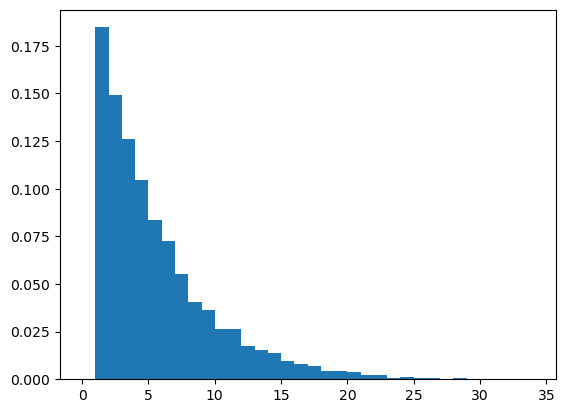

In [9]:
lowest_record = get_lowest_number(cards_record)
plt.hist(lowest_record, bins=np.arange(0,35), density=True)
plt.show()

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

In [10]:
# To Do cell
def compute_largest_gap_all_cards(cards_record):
    largest_gap_all_cards = [] # record largest gap among all cards in one sample
    for i in range(rep):
        cards_flatten = np.sort(cards_record[i], axis=None)
        cards_gap = [cards_flatten[i] - cards_flatten[i-1] for i in range(1, len(cards_flatten))]
        largest_gap = max(cards_gap)
        largest_gap_all_cards.append(largest_gap)
    return largest_gap_all_cards

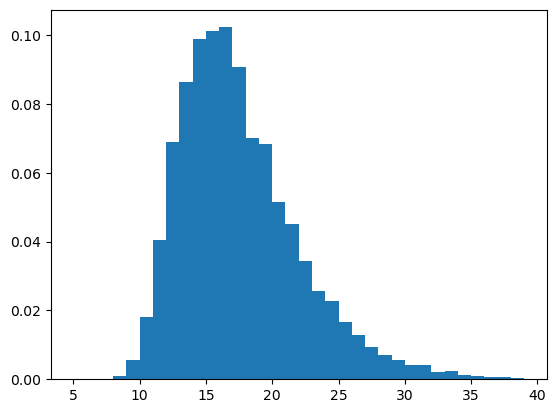

In [11]:
largest_gap_all_cards = compute_largest_gap_all_cards(cards_record)    
plt.hist(largest_gap_all_cards, bins=np.arange(5,40), density=True)
plt.show()

Repeat the experiment but now compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

In [12]:
# To Do cell
def compute_largest_gap_between_players(cards_record, n, k):
    largest_gap_between_players = []
    for i in range(len(cards_record)):
        cards = cards_record[i]
        max_gap = 0
        pointers = [0] * n # n pointers to each of the player

        while True:

            # each player show one card, and compute the maximum gap
            compare_cards = sorted([cards[j][pointers[j]] for j in range(n)]) 
            temp_gap = [compare_cards[j] - compare_cards[j-1] for j in range(1, n)]
            max_gap = max(max_gap, max(temp_gap))

            # find the next consecutive card
            min_next = float('inf')
            min_next_player = -1
            for l in range(n):
                if pointers[l]+1 < k:
                    if cards[l][pointers[l]+1] < min_next:
                        min_next = cards[l][pointers[l]+1]
                        min_next_player = l


            if min_next_player > 0:

                # if find the next consecutive card, continue calculate maximum gap
                pointers[min_next_player] += 1
            else:

                # if can't find the next consecutive card, stop loop
                break

        largest_gap_between_players.append(max_gap)
    
    return largest_gap_between_players
    

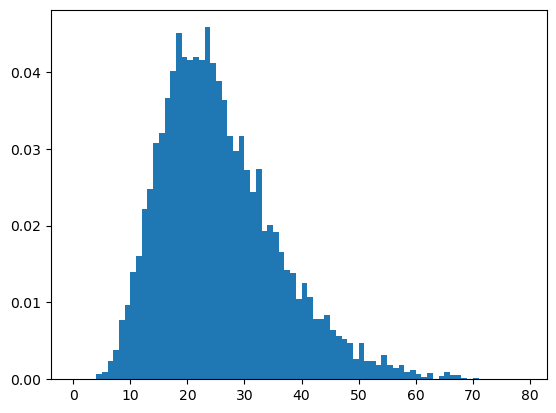

In [13]:
largest_gap_between_players = compute_largest_gap_between_players(cards_record, n, k)
plt.hist(largest_gap_between_players, bins=np.arange(0,80), density=True)
plt.show()

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

In [14]:
# To Do cell
N_list = [100, 500, 1000]
n_list = [4, 6, 8]
largest_gap_all_cards_record = []
largest_gap_between_players_record = []
for i in range(len(N_list)):
    largest_gap_all_cards_record.append([])
    largest_gap_between_players_record.append([])
    for j in range(len(n_list)):
        temp_cards_record = sample_game(N_list[i], n_list[j], k, rep)
        largest_gap_all_cards = compute_largest_gap_all_cards(temp_cards_record)
        largest_gap_between_players = compute_largest_gap_between_players(temp_cards_record, n_list[j], k)
        largest_gap_all_cards_record[i].append(largest_gap_all_cards)
        largest_gap_between_players_record[i].append(largest_gap_between_players)

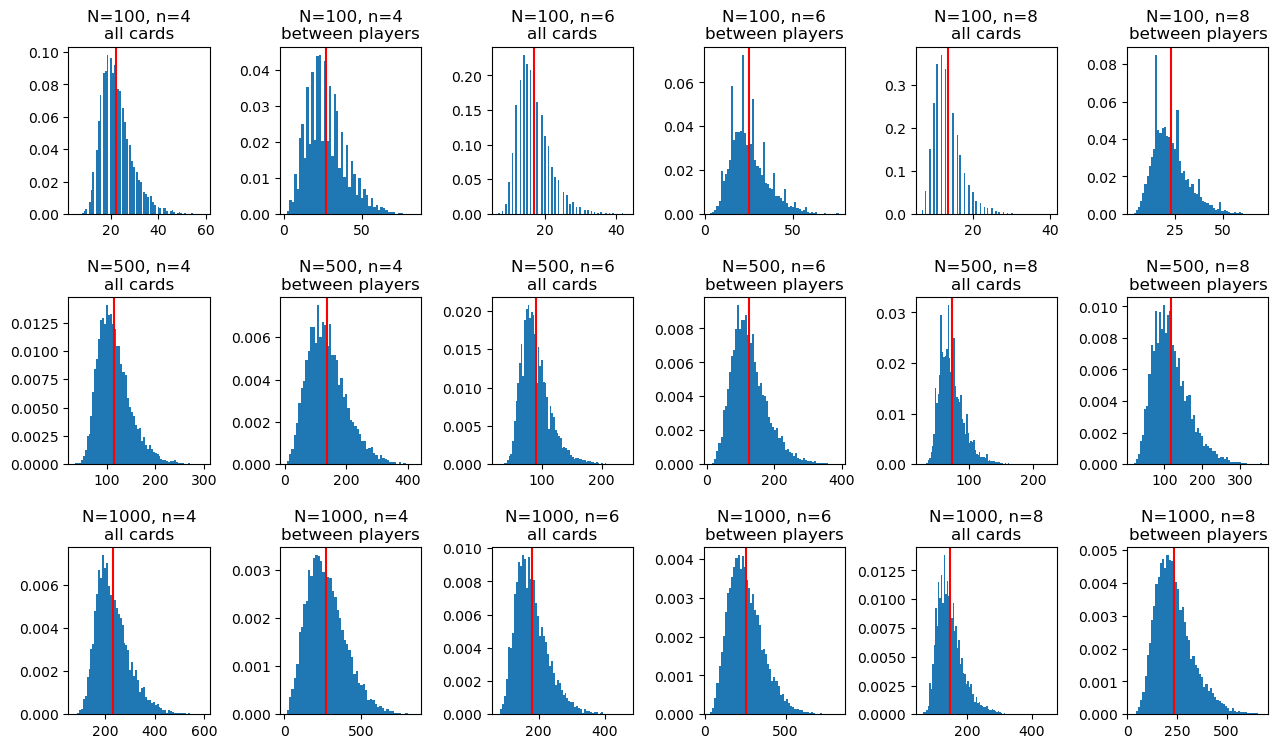

In [15]:
'''
plot histogram for all simulations. Red lines are means of distribution.
'''
fig, axs = plt.subplots(3, 6)  
for i in range(len(N_list)):
    for j in range(len(n_list)):
        axs[i, 2*j].hist(largest_gap_all_cards_record[i][j], bins='auto', density = True)
        axs[i, 2*j].axvline(np.mean(largest_gap_all_cards_record[i][j]), color='r')
        axs[i, 2*j].set_title('N='+str(N_list[i])+', n='+str(n_list[j])+'\nall cards')
        axs[i, 2*j+1].hist(largest_gap_between_players_record[i][j], bins="auto", density = True)
        axs[i, 2*j+1].axvline(np.mean(largest_gap_between_players_record[i][j]), color='r')
        axs[i, 2*j+1].set_title('N='+str(N_list[i])+', n='+str(n_list[j])+'\nbetween players')
plt.subplots_adjust(left=0.125,
            bottom=-0.51,
            right=2,
            top=0.88,
            wspace=0.5,
            hspace=0.5)
plt.show()

In [16]:
# calculate difference of the means of the distribution
diff_record = []
for i in range(len(N_list)):
    diff_record.append([])
    for j in range(len(n_list)):
        diff_record[i].append(np.mean(largest_gap_between_players_record[i][j]) - np.mean(largest_gap_all_cards_record[i][j]))
diff_record

[[4.911200000000001, 8.224, 9.3929],
 [21.36099999999999, 36.925200000000004, 44.286500000000004],
 [44.58000000000001, 74.1258, 88.00969999999998]]

**Observations**

For fixed `N`, when `n` gets larger, the difference of the mean of the two distribution becomes larger. 
Intuitively, when `n` gets larger, number of total used cards becomes larger. Thus consecutive difference of cards between players would increase "faster" than consecutive difference of all used cards (All used cards should more like uniform distributed in (1,N))

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

In [17]:
# To Do cell

# number of cards lower than a certain value is a binomial random variable
# first, we modify sample_cards() to allow replacement
# Then we implement the random variable generator

def binomial_generator(cards_record, N, p):
    binomial_random_numbers = []
    threshold = int(N * p)
    for i in range(len(cards_record)):
        cards = cards_record[i]
        binomial_random_numbers.append(np.sum(cards < threshold))
    return binomial_random_numbers

In [18]:
p = 0.5
cards_record_replace = sample_game(N, n, k, rep, replace=True)
binomial_random_numbers = binomial_generator(cards_record_replace, N, p)

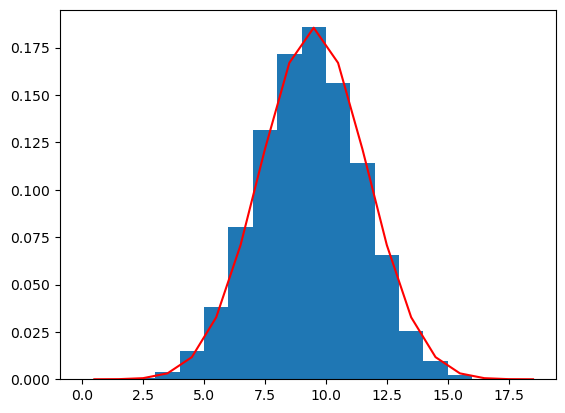

In [19]:
x = np.linspace(0, 18, 19)
plt.hist(binomial_random_numbers, bins=np.arange(0,19), density=True)
plt.plot(x+0.5, scipy.stats.binom.pmf(x, n*k, p), color='red')
plt.show()

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

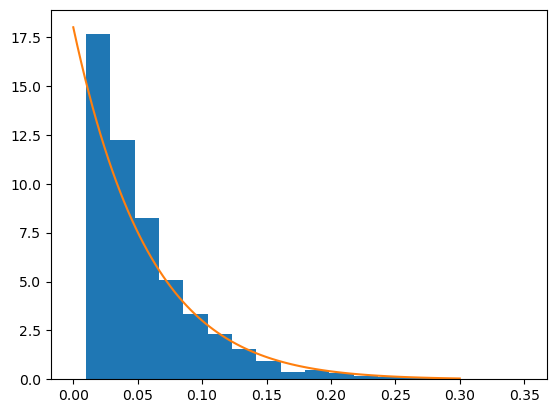

In [20]:
plt.hist(np.array(lowest_record) / 100, bins=18, density=True)
plt.plot(np.linspace(0, 0.3, 100), scipy.stats.beta.pdf(np.linspace(0, 0.3, 100), 1, n*k))
plt.show()                                        

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

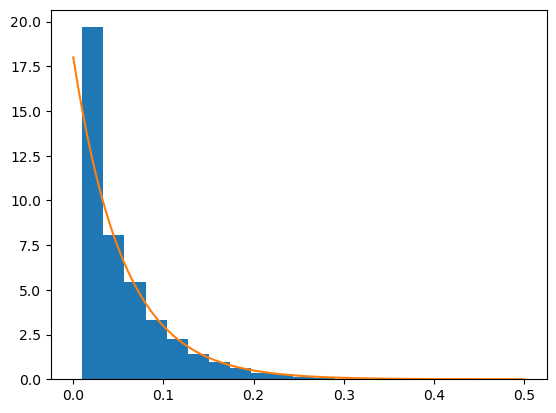

In [21]:
plt.hist(-np.log(1-np.array(lowest_record)/N), bins=18, density=True)
plt.plot(np.linspace(0, 0.5, 100), scipy.stats.expon.pdf(np.linspace(0, 0.5, 100), scale=1/(n*k)))
plt.show()

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

In [22]:
# To Do cell
big_N = 100000
cards_record_N = sample_game(big_N, n, k, rep)
lowest_record_N = get_lowest_number(cards_record_N)
binomial_random_numbers_N = binomial_generator(cards_record_N, big_N, p)

cards_record_noreplace = sample_game(big_N, n, k, rep, replace=False)
lowest_record_noreplace = get_lowest_number(cards_record_noreplace)
binomial_random_numbers_noreplace = binomial_generator(cards_record_noreplace, big_N, p)

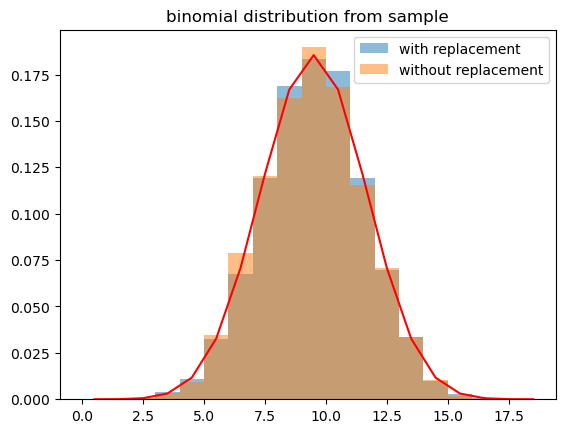

In [23]:
plt.hist(binomial_random_numbers_N, bins=np.arange(0,18), 
         density=True, alpha=0.5, label="with replacement")
plt.hist(binomial_random_numbers_noreplace, bins=np.arange(0,18), 
         density=True, alpha=0.5, label = "without replacement")
plt.plot(x+0.5, scipy.stats.binom.pmf(x, n*k, p), color='red')
plt.legend(loc='upper right')
plt.title('binomial distribution from sample')
plt.show()

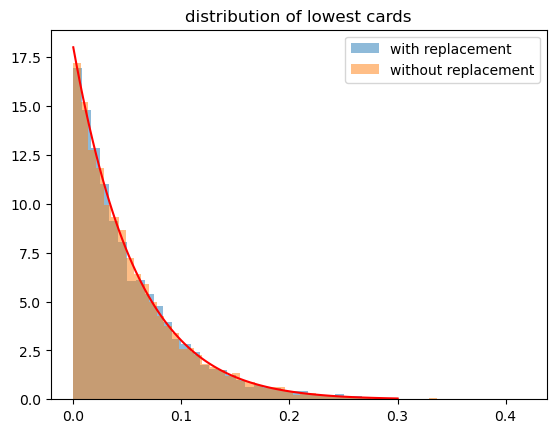

In [24]:
plt.hist(np.array(lowest_record_N)/big_N, bins=50, density=True, alpha=0.5, label="with replacement")
plt.hist(np.array(lowest_record_noreplace)/big_N, bins=50, density=True, alpha=0.5, label = "without replacement")
plt.plot(np.linspace(0, 0.3, 100), scipy.stats.beta.pdf(np.linspace(0, 0.3, 100), 1, n*k), color="red")
plt.legend(loc='upper right')
plt.title('distribution of lowest cards')
plt.show()

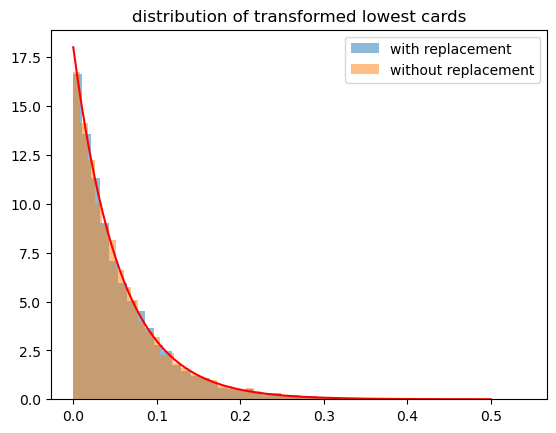

In [25]:
plt.hist(-np.log(1-np.array(lowest_record_N)/big_N), bins=50, density=True, alpha=0.5, label="with replacement")
plt.hist(-np.log(1-np.array(lowest_record_noreplace)/big_N), bins=50, density=True, alpha=0.5, label = "without replacement")
plt.plot(np.linspace(0, 0.5, 100), scipy.stats.expon.pdf(np.linspace(0, 0.5, 100), scale=1/(n*k)), color="red")
plt.legend(loc='upper right')
plt.title("distribution of transformed lowest cards")
plt.show()

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Haodong Ling (Github username: milanmarks)
- Member No2: 
- Member No3: